In [3]:
# Графический интерфейс внизу в последнем блоке

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# 1. Загрузка данных

In [2]:
df = pd.read_csv('dataset_diabetes/diabetic_data_1.csv', sep=';')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,28236,89869032,AfricanAmerican,Female,[40-50),?,1,1,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
4,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [4]:
df.shape

(101766, 50)

In [5]:
df['encounter_id'].nunique()

101766

Установим столбец encounter_id в качестве индексов

In [6]:
df = df.set_index(['encounter_id'])

# 2. Очистка данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 12522 to 443867222
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   patient_nbr               101766 non-null  int64 
 1   race                      101766 non-null  object
 2   gender                    101766 non-null  object
 3   age                       101766 non-null  object
 4   weight                    101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                101766 non-null  object
 10  medical_specialty         101766 non-null  object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 1

Проверим столбцы, которые согласно описанию содержат много пропущенных значений

In [8]:
# 97 пропущенных значений
df['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [9]:
df['payer_code'].value_counts()

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [10]:
df['medical_specialty'].value_counts()

?                                   49949
InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
                                    ...  
SportsMedicine                          1
Perinatology                            1
Surgery-PlasticwithinHeadandNeck        1
Dermatology                             1
Proctology                              1
Name: medical_specialty, Length: 73, dtype: int64

Удалим их и столбец patient_nbr

In [11]:
df.drop(['weight', 'payer_code', 'medical_specialty', 'patient_nbr'], axis=1, inplace=True)

In [12]:
for col in df.columns:
    print(f"{col}:")
    print(df[col].unique())
    print('#' * 10)


race:
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
##########
gender:
['Female' 'Male' 'Unknown/Invalid']
##########
age:
['[80-90)' '[90-100)' '[40-50)' '[50-60)' '[60-70)' '[70-80)' '[20-30)'
 '[10-20)' '[30-40)' '[0-10)']
##########
admission_type_id:
[2 3 1 6 4 5 8 7]
##########
discharge_disposition_id:
[ 1  3  6  2  5 11  7 25 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
##########
admission_source_id:
[ 4  7  2  1  5  6 20  3 17  8  9 14 10 22 11 25 13]
##########
time_in_hospital:
[13 12  1  9  3  7 10  4  5  2  6 11  8 14]
##########
num_lab_procedures:
[ 68  33  51  47  31  62  60  55  70  49  73  11  75  45  29  35  42  59
  66  36  19  64  25  53  52  87  27  37  46  41  44  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102 100   7  89 

['No' 'Steady' 'Down' 'Up']
##########
acetohexamide:
['No' 'Steady']
##########
glipizide:
['Steady' 'No' 'Up' 'Down']
##########
glyburide:
['No' 'Up' 'Steady' 'Down']
##########
tolbutamide:
['No' 'Steady']
##########
pioglitazone:
['No' 'Steady' 'Up' 'Down']
##########
rosiglitazone:
['No' 'Steady' 'Up' 'Down']
##########
acarbose:
['No' 'Steady' 'Up' 'Down']
##########
miglitol:
['No' 'Steady' 'Down' 'Up']
##########
troglitazone:
['No' 'Steady']
##########
tolazamide:
['No' 'Steady' 'Up']
##########
examide:
['No']
##########
citoglipton:
['No']
##########
insulin:
['Steady' 'Down' 'No' 'Up']
##########
glyburide-metformin:
['No' 'Steady' 'Down' 'Up']
##########
glipizide-metformin:
['No' 'Steady']
##########
glimepiride-pioglitazone:
['No' 'Steady']
##########
metformin-rosiglitazone:
['No' 'Steady']
##########
metformin-pioglitazone:
['No' 'Steady']
##########
change:
['Ch' 'No']
##########
diabetesMed:
['Yes' 'No']
##########
readmitted:
['NO' '>30' '<30']
##########


In [13]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [14]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

Пустые значения составляют около 1% данных. Предположительно, заполнение этих данных какими-либо значениями может оказать большее негативное влияние на модель, чем удаление. Удалим их.

In [15]:
df = df[df['race'] != '?']
df = df[df['gender'] != 'Unknown/Invalid']

In [16]:
df.shape

(99492, 45)

In [17]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
12522,Caucasian,Female,[80-90),2,1,4,13,68,2,28,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
15738,Caucasian,Female,[90-100),3,3,4,12,33,3,18,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
16680,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
28236,AfricanAmerican,Female,[40-50),1,1,7,9,47,2,17,...,No,Steady,No,No,No,No,No,No,Yes,>30
35754,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,>30


# 3. Анализ переменных

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admission_type_id,99492.0,2.027238,1.450861,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,99492.0,3.740884,5.309413,1.0,1.0,1.0,4.0,28.0
admission_source_id,99492.0,5.770997,4.072906,1.0,1.0,7.0,7.0,25.0
time_in_hospital,99492.0,4.398454,2.986972,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,99492.0,43.072971,19.695587,1.0,31.0,44.0,57.0,132.0
num_procedures,99492.0,1.340540,1.703686,0.0,0.0,1.0,2.0,6.0
num_medications,99492.0,16.026545,8.119809,1.0,10.0,15.0,20.0,81.0
number_outpatient,99492.0,0.373357,1.276805,0.0,0.0,0.0,0.0,42.0
number_emergency,99492.0,0.201343,0.939981,0.0,0.0,0.0,0.0,76.0
number_inpatient,99492.0,0.643107,1.271370,0.0,0.0,0.0,1.0,21.0


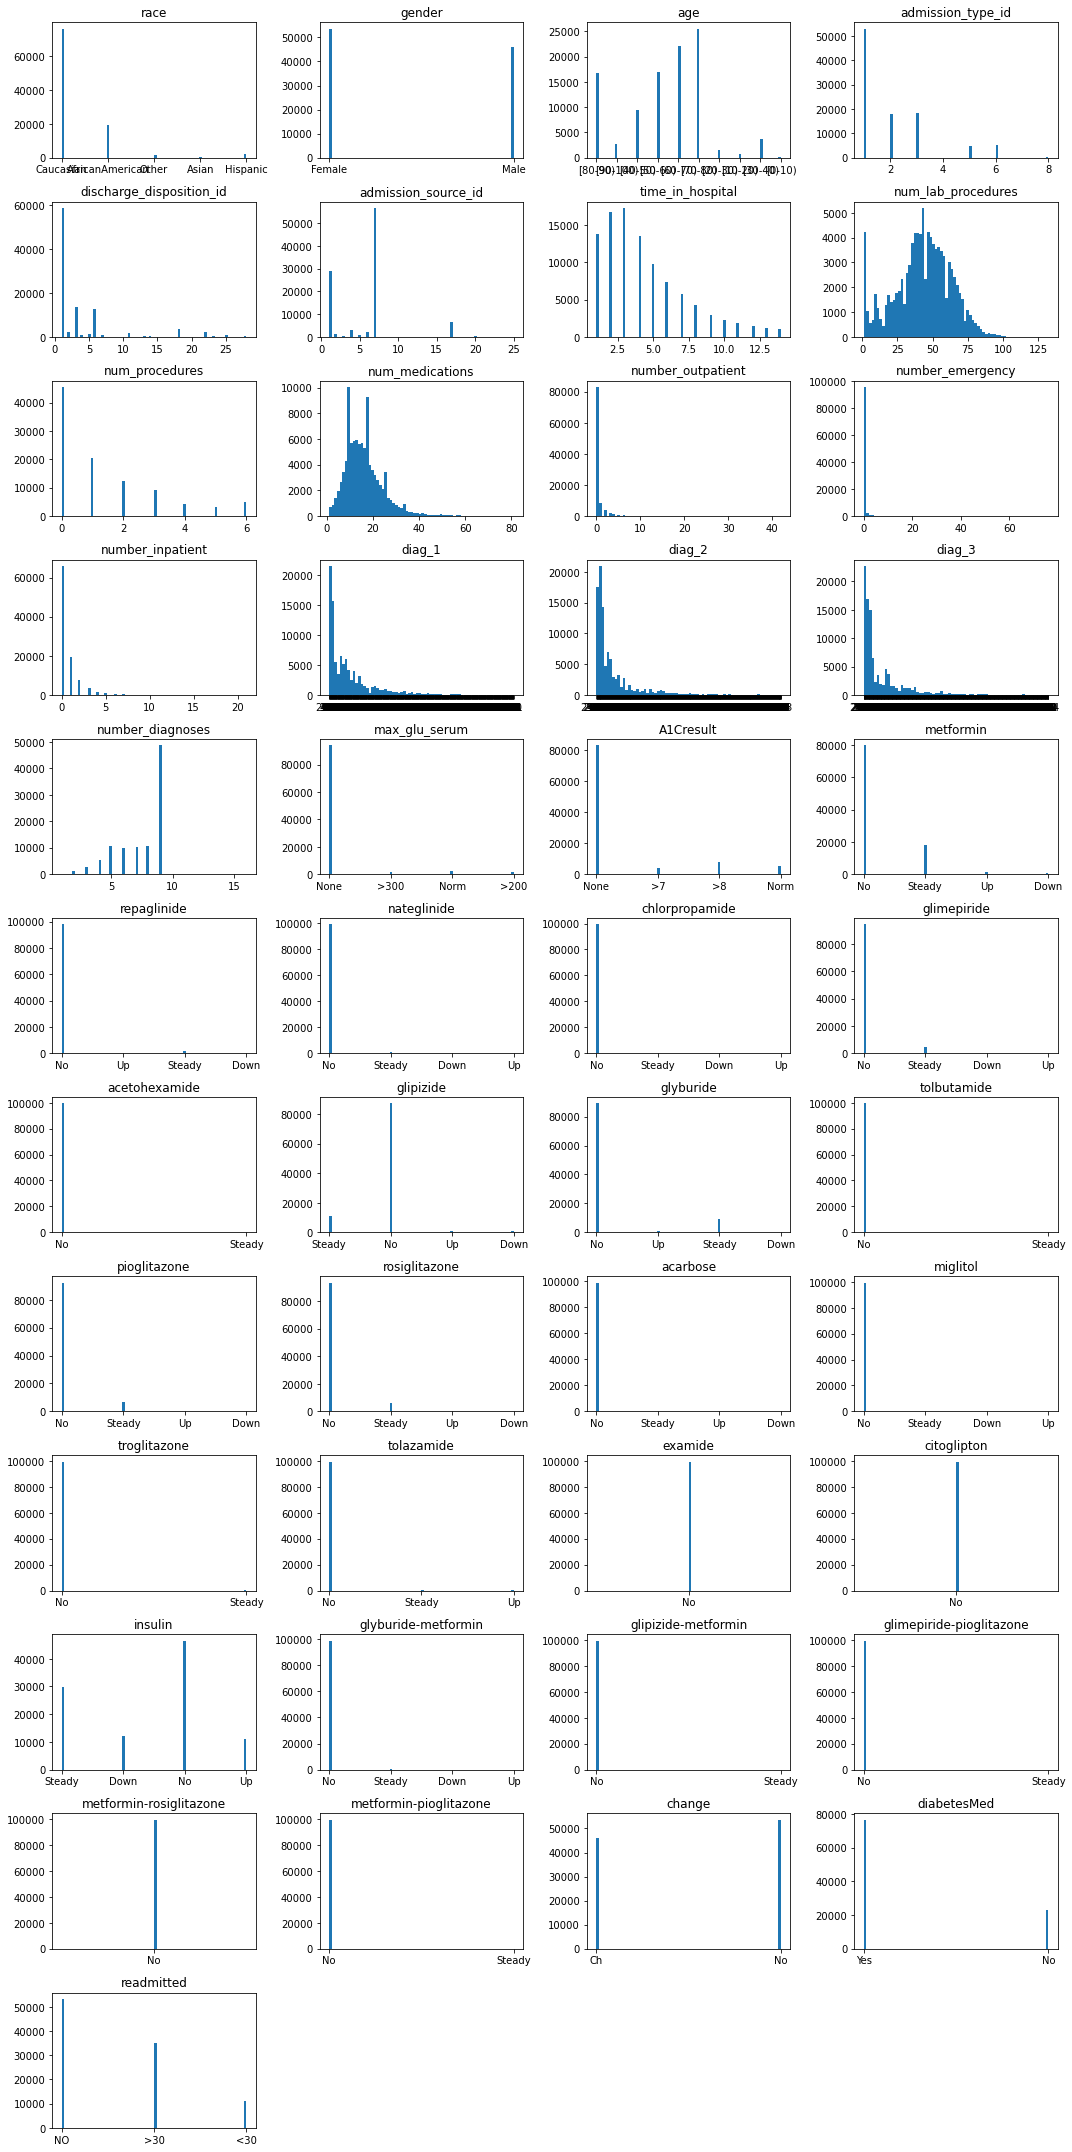

In [31]:
plt.figure(figsize=(15,30))
for ind,col in enumerate(df.columns):
    plt.subplot(12,4,ind+1)
    plt.hist(df[col], bins=70)
    plt.title(col)
    plt.tight_layout()

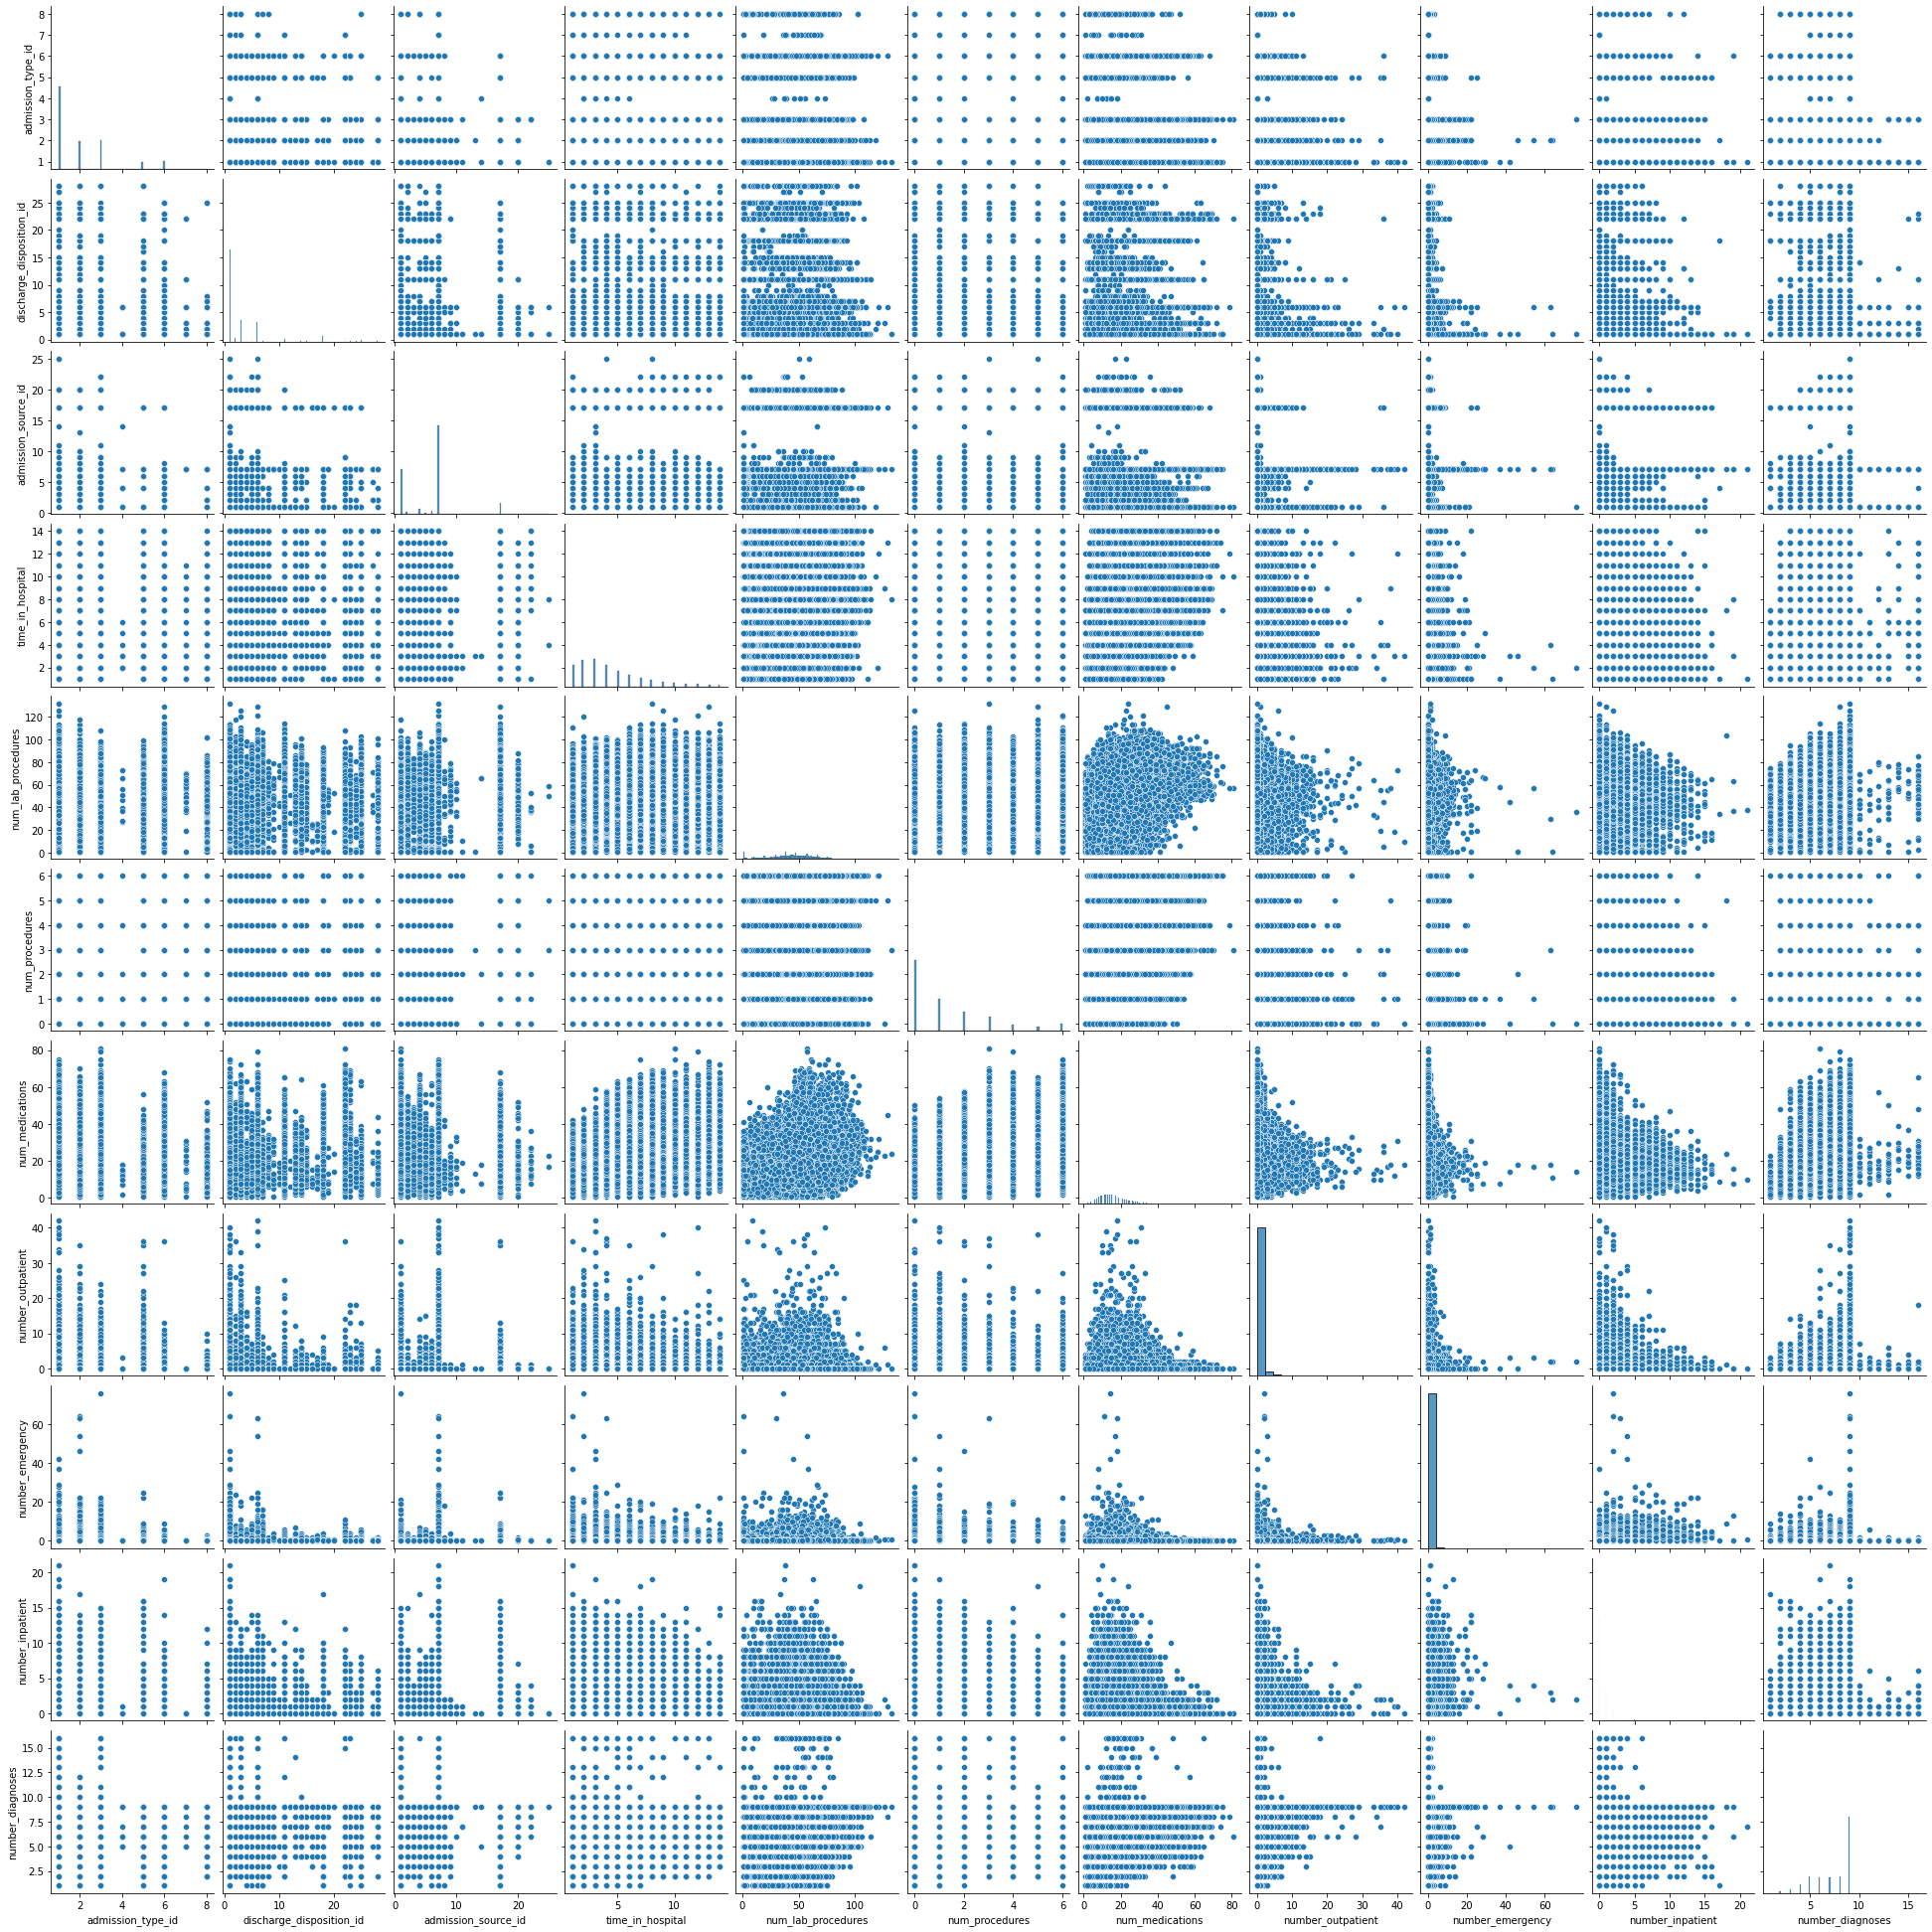

In [32]:
sns.pairplot(df)

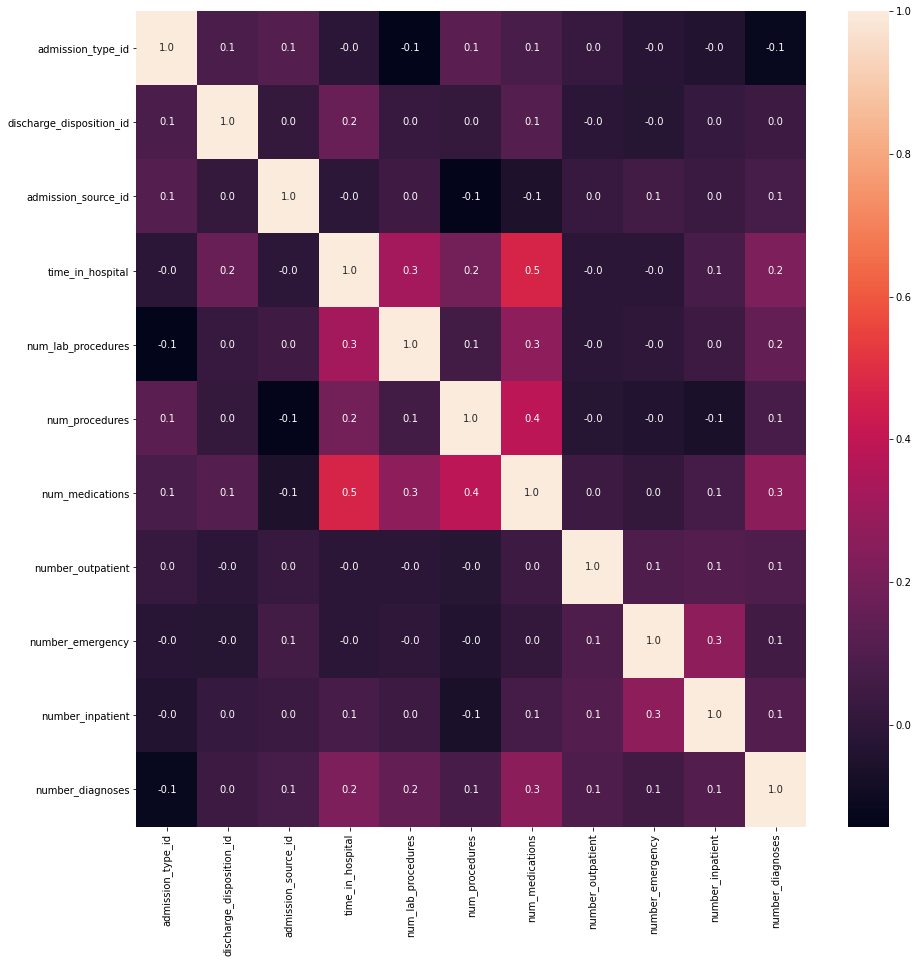

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt=".1f");

В данных присутствуют средние прямые корреляции между количеством процедур и выписанных лекарств с временем, проведенным в больнице и количеством диагнозов, а также между количеством обращений в скорую и в клинику.

<AxesSubplot:xlabel='readmitted', ylabel='count'>

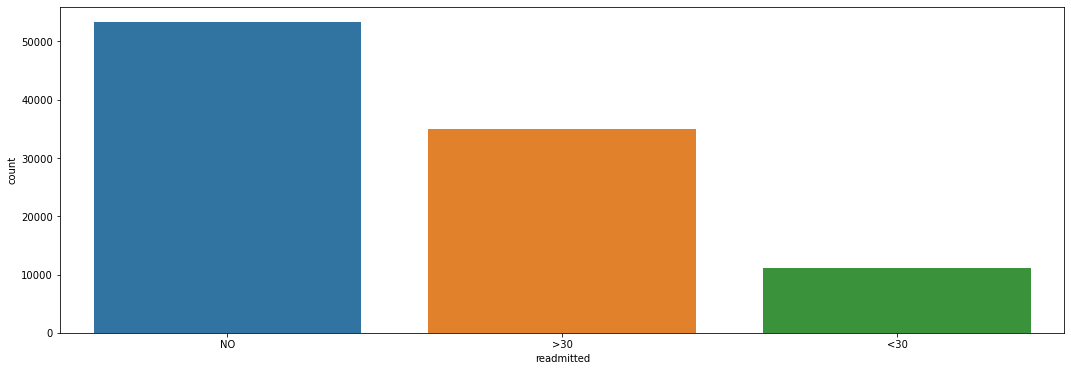

In [34]:
plt.figure(figsize=(18,6))
sns.countplot(df['readmitted'])

Видим, что выборка несбалансирована по целевой переменной

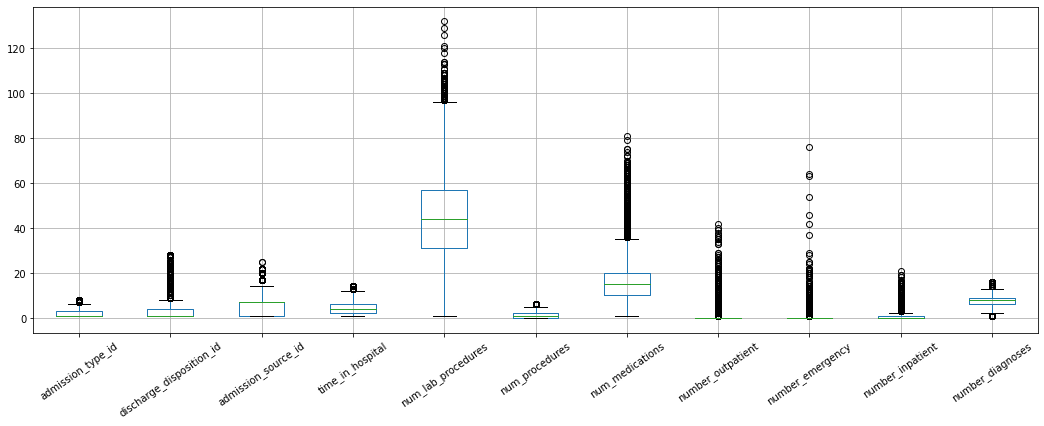

In [39]:
df.boxplot(figsize = (18,6))
plt.xticks(rotation=35)
plt.show()

Видим, что в признаках присутствует достаточно большое количество выбросов.
Но, исходя из задачи, предполагаем, что выбросы могут в значительной степени объяснять целевую переменную.
Удалять их пока не будем.

Проверим распределение количественных признаков по целевой переменной

In [ ]:
cols=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16]

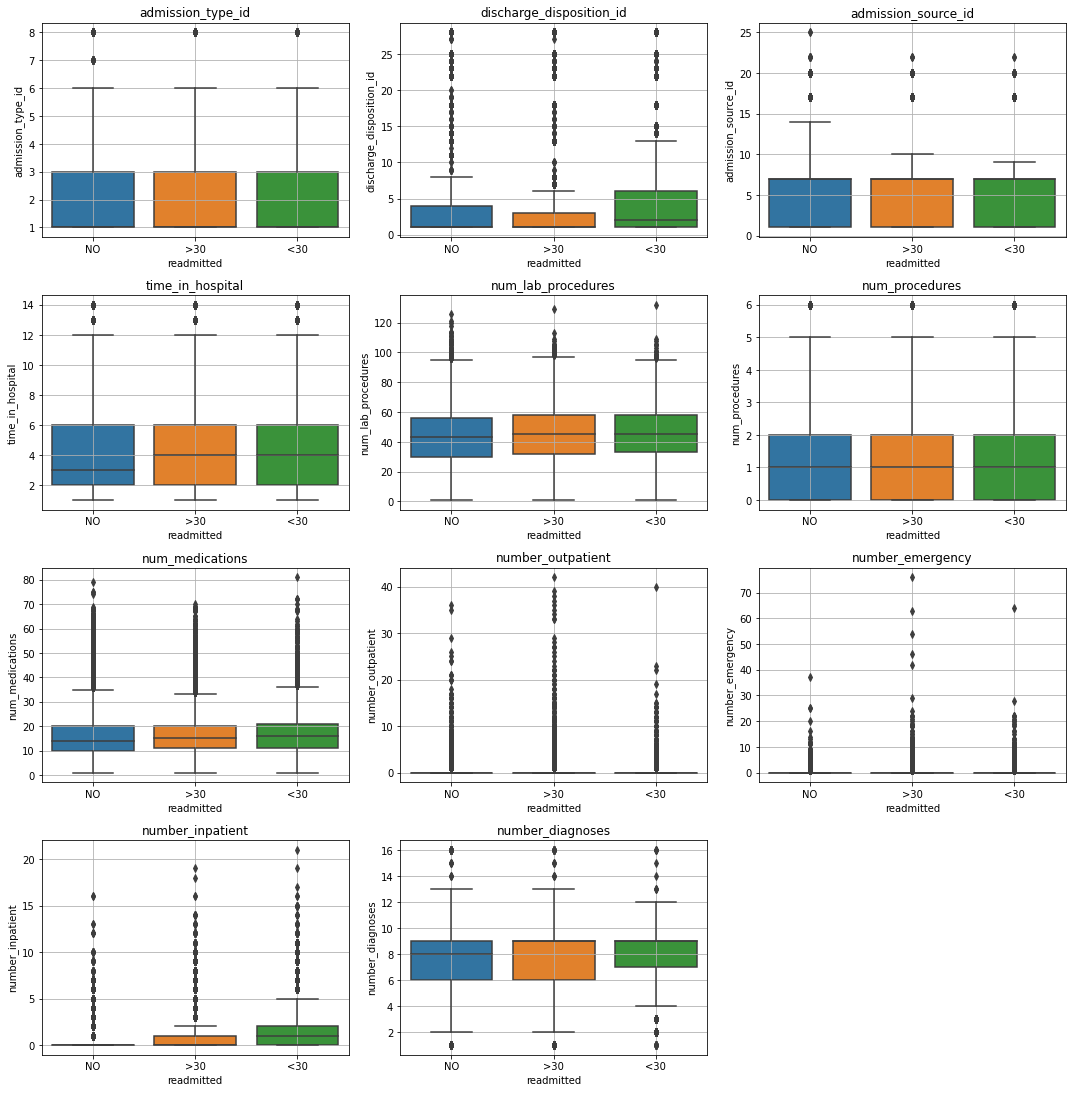

In [66]:
plt.figure(figsize=(15,30))
for ind,col in enumerate(df.columns[[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16]]):
    plt.subplot(8,3, ind+1) 
    sns.boxplot(x='readmitted', y=col, data=df) 
    plt.title(col)
    plt.tight_layout() 
    plt.xticks()
    plt.grid()

Из распределений видно, что существуют прямые зависимости в распределении некоторых количественных признаков. 

Однако, явных аномалий, показывающих, что выбросы объясняют целевую метку (<30) нет.

Более полный анализ распределения целевой переменной представлен далее после кодирования


# Кодирование

In [19]:
for col in df.columns:
    print(f"{col}:")
    print(df[col].unique())
    print('#' * 10)


race:
['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
##########
gender:
['Female' 'Male']
##########
age:
['[80-90)' '[90-100)' '[40-50)' '[50-60)' '[60-70)' '[70-80)' '[20-30)'
 '[10-20)' '[30-40)' '[0-10)']
##########
admission_type_id:
[2 3 1 6 4 5 8 7]
##########
discharge_disposition_id:
[ 1  3  6  2  5 11  7 25 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
##########
admission_source_id:
[ 4  7  2  1  5  6 20  3 17  8  9 14 10 22 11 25 13]
##########
time_in_hospital:
[13 12  1  9  3  7 10  4  5  2 11  6  8 14]
##########
num_lab_procedures:
[ 68  33  51  47  31  62  60  55  70  49  73  11  75  45  29  35  59  42
  19  64  25  53  52  87  27  37  46  41  44  28  36  48  72  10   2  65
  67  40  58  57  32  83  34  39  69  38  56  22  96  78  61  88  66  43
  50   1  18  82  54   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26  95  97  84  14  74 105  86  98
  20   5   6  94   8 102 100   7  89  91  92   4 101  99 11

['No' 'Steady' 'Down' 'Up']
##########
acetohexamide:
['No' 'Steady']
##########
glipizide:
['Steady' 'No' 'Up' 'Down']
##########
glyburide:
['No' 'Up' 'Steady' 'Down']
##########
tolbutamide:
['No' 'Steady']
##########
pioglitazone:
['No' 'Steady' 'Up' 'Down']
##########
rosiglitazone:
['No' 'Steady' 'Up' 'Down']
##########
acarbose:
['No' 'Steady' 'Up' 'Down']
##########
miglitol:
['No' 'Steady' 'Down' 'Up']
##########
troglitazone:
['No' 'Steady']
##########
tolazamide:
['No' 'Steady' 'Up']
##########
examide:
['No']
##########
citoglipton:
['No']
##########
insulin:
['Steady' 'Down' 'No' 'Up']
##########
glyburide-metformin:
['No' 'Steady' 'Down' 'Up']
##########
glipizide-metformin:
['No' 'Steady']
##########
glimepiride-pioglitazone:
['No' 'Steady']
##########
metformin-rosiglitazone:
['No']
##########
metformin-pioglitazone:
['No' 'Steady']
##########
change:
['Ch' 'No']
##########
diabetesMed:
['Yes' 'No']
##########
readmitted:
['NO' '>30' '<30']
##########


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 12522 to 443867222
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99492 non-null  object
 1   gender                    99492 non-null  object
 2   age                       99492 non-null  object
 3   admission_type_id         99492 non-null  int64 
 4   discharge_disposition_id  99492 non-null  int64 
 5   admission_source_id       99492 non-null  int64 
 6   time_in_hospital          99492 non-null  int64 
 7   num_lab_procedures        99492 non-null  int64 
 8   num_procedures            99492 non-null  int64 
 9   num_medications           99492 non-null  int64 
 10  number_outpatient         99492 non-null  int64 
 11  number_emergency          99492 non-null  int64 
 12  number_inpatient          99492 non-null  int64 
 13  diag_1                    99492 non-null  object
 14  diag_2        

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
le_cols = ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3']

In [24]:
for col in le_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    np.save(f"le_{col}.npy", le.classes_)

In [25]:
repl_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
             'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
             'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
             'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
]
df['max_glu_serum'].replace({'None':0, '>300':1, 'Norm':2, '>200':3}, inplace = True)
df['A1Cresult'].replace({'None':0, '>7':1, 'Norm':2, '>8':3}, inplace = True)
df['change'].replace({'No':0, 'Ch':1}, inplace = True)
df['diabetesMed'].replace({'No':0, 'Yes':1}, inplace = True)
for col in repl_cols:
    df[col].replace({'No':0, 'Steady':1, 'Up':2, 'Down':3}, inplace = True)

In [26]:
df['readmitted'].replace({'NO':0, '>30':1, '<30':2}, inplace = True)

In [27]:
for col in df.columns:
    print(f"{col}:")
    print(df[col].unique())
    print('#' * 10)

race:
[2 0 4 1 3]
##########
gender:
[0 1]
##########
age:
[8 9 4 5 6 7 2 1 3 0]
##########
admission_type_id:
[2 3 1 6 4 5 8 7]
##########
discharge_disposition_id:
[ 1  3  6  2  5 11  7 25 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
##########
admission_source_id:
[ 4  7  2  1  5  6 20  3 17  8  9 14 10 22 11 25 13]
##########
time_in_hospital:
[13 12  1  9  3  7 10  4  5  2 11  6  8 14]
##########
num_lab_procedures:
[ 68  33  51  47  31  62  60  55  70  49  73  11  75  45  29  35  59  42
  19  64  25  53  52  87  27  37  46  41  44  28  36  48  72  10   2  65
  67  40  58  57  32  83  34  39  69  38  56  22  96  78  61  88  66  43
  50   1  18  82  54   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26  95  97  84  14  74 105  86  98
  20   5   6  94   8 102 100   7  89  91  92   4 101  99 114 113 111 129
 107 108 106 104 109 120 132 121 126 118]
##########
num_procedures:
[2 3 0 6 1 5 4]
##########
num_medications:
[28 18  8 17 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 12522 to 443867222
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      99492 non-null  int32
 1   gender                    99492 non-null  int32
 2   age                       99492 non-null  int32
 3   admission_type_id         99492 non-null  int64
 4   discharge_disposition_id  99492 non-null  int64
 5   admission_source_id       99492 non-null  int64
 6   time_in_hospital          99492 non-null  int64
 7   num_lab_procedures        99492 non-null  int64
 8   num_procedures            99492 non-null  int64
 9   num_medications           99492 non-null  int64
 10  number_outpatient         99492 non-null  int64
 11  number_emergency          99492 non-null  int64
 12  number_inpatient          99492 non-null  int64
 13  diag_1                    99492 non-null  int32
 14  diag_2                    9949

### Повторный анализ распределения целевой переменной

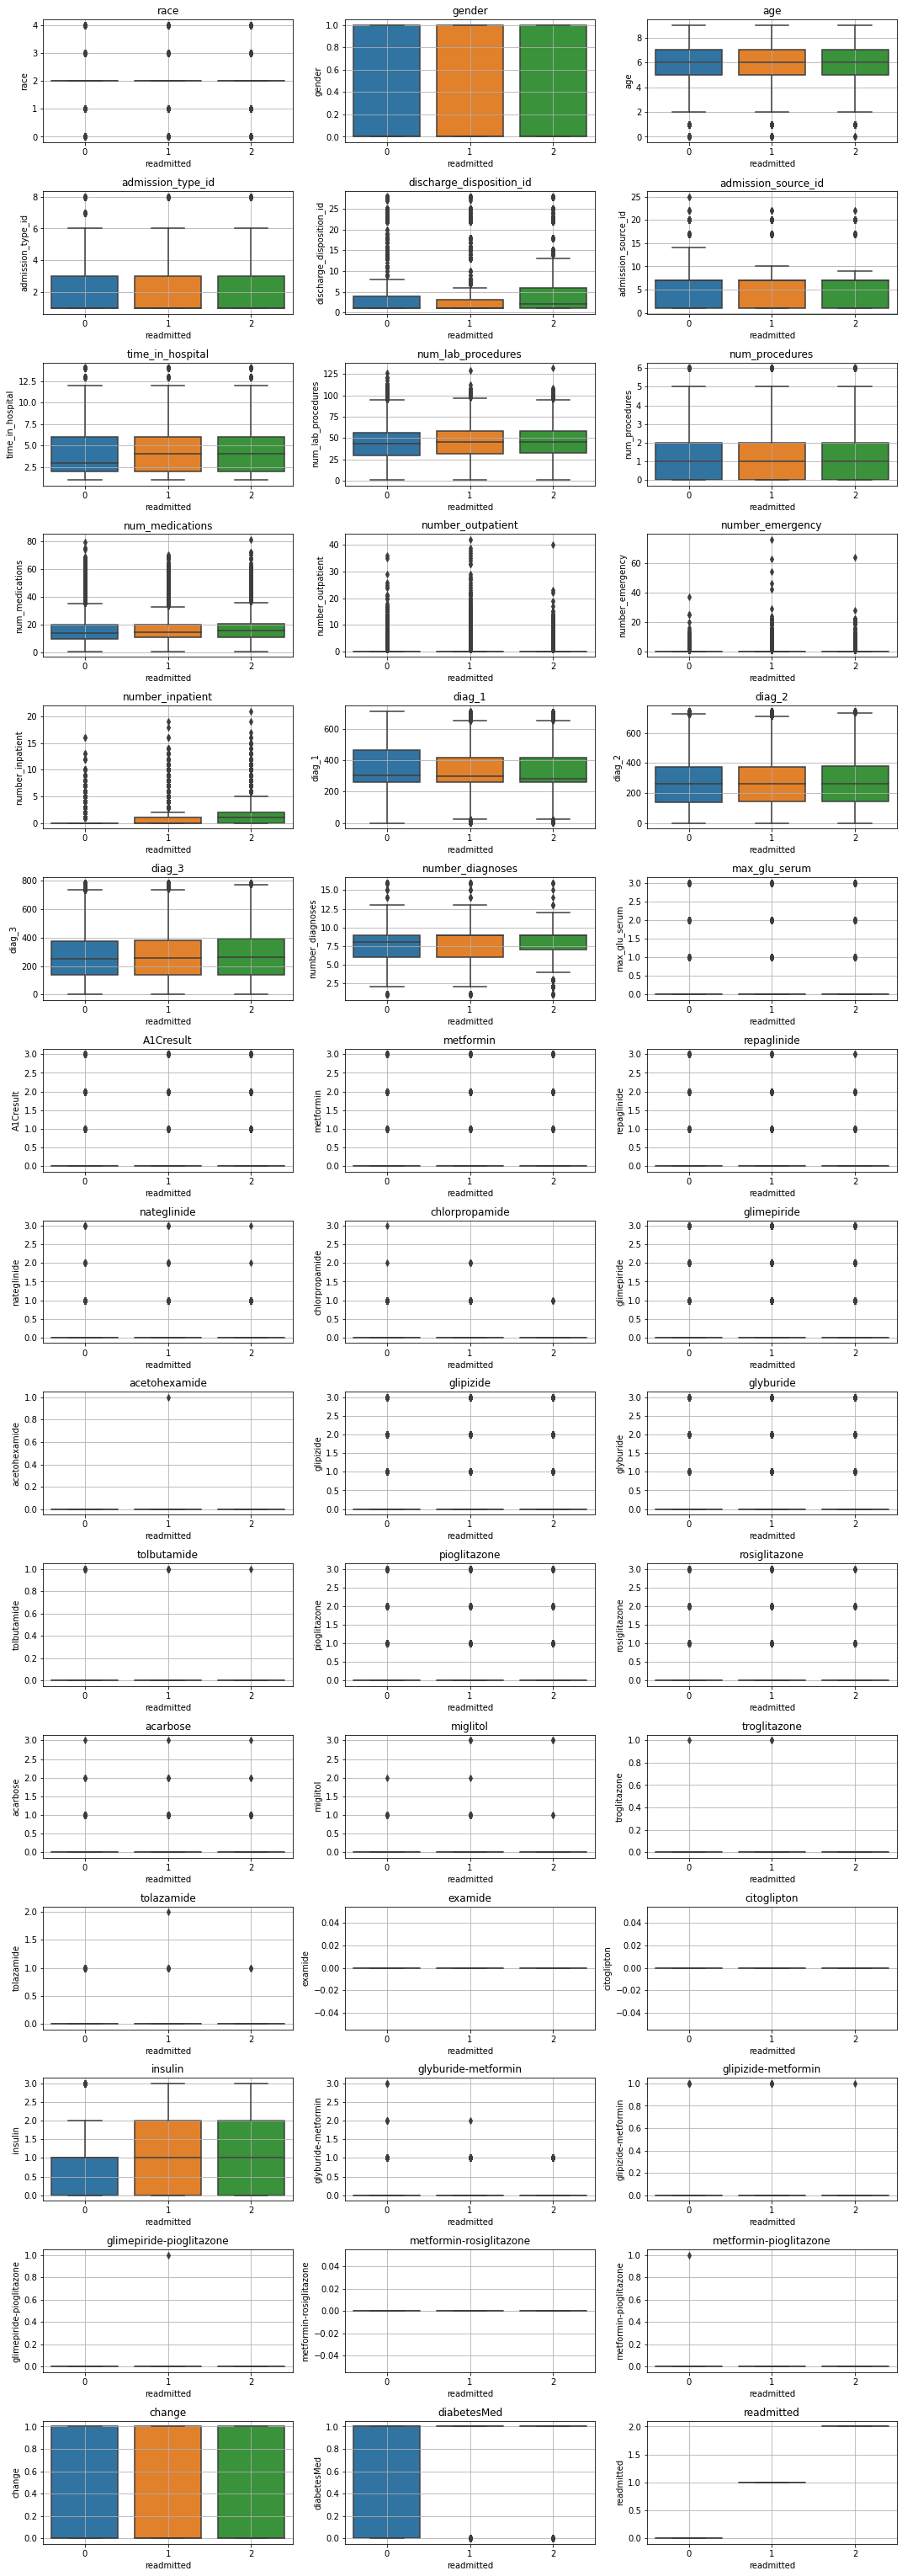

In [32]:
plt.figure(figsize=(15,45))
for ind,col in enumerate(df.columns):
    plt.subplot(16,3, ind+1) 
    sns.boxplot(x='readmitted', y=col, data=df) 
    plt.title(col)
    plt.tight_layout() 
    plt.xticks()
    plt.grid()

Из распределений целевой переменной по всем признакам видно следующее:

1) Присутствуют явные зависимости (прямые и одна обратная) в распределении целевой переменной по некоторым признакам.

2) Выбросы не объясняют или очень слабо объясняют целевую метку (<30 - 2).

Это дает возможности для удаления выбросов из выборки для усиления влияния распределений целевой переменной по признакам на модели, а также для отбора малозначащих признаков.

# 4. Классификация

In [29]:
# Нестандартизованные значения для plot-importance
from sklearn.model_selection import train_test_split
x = df.drop('readmitted', axis=1)
y = df['readmitted']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = y)

In [30]:
# Стандартизованная выборка
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
df_scal = scal.fit_transform(df.drop("readmitted", axis = 1))
x = df_scal.copy()
y = df["readmitted"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = y)

## Отбор моделей и признаков

In [2]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Xgboost feature importance

In [32]:
xgb_cls= XGBClassifier(n_estimators=100, n_jobs=-1)

In [33]:
xgb_cls.fit(X_train, Y_train)

[19:12:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [34]:
xgb_cls.score(X_test, Y_test)

0.5900296497311422

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

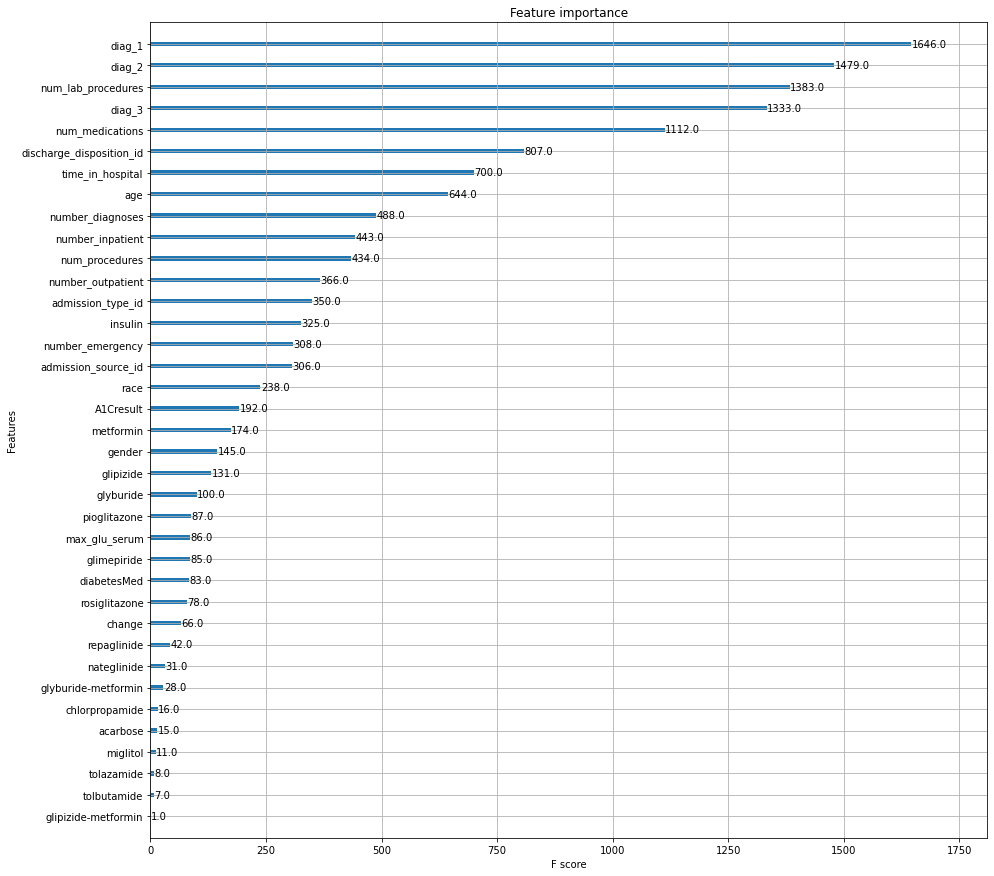

In [51]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(15, 15))
plot_importance(xgb_cls, ax=ax)
#plot_importance(xgb_cls)

In [39]:
print(classification_report(Y_test,xgb_cls.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.82      0.71     10663
           1       0.51      0.42      0.46      7002
           2       0.40      0.04      0.07      2234

    accuracy                           0.59     19899
   macro avg       0.51      0.43      0.41     19899
weighted avg       0.56      0.59      0.55     19899



### LR feature importance

In [40]:
model = LogisticRegression()
parameters = {'C':[0.001,0.01,0.1,1.0,10,100]}

In [41]:
from sklearn.model_selection import GridSearchCV
gridLogReg = GridSearchCV(estimator=model, param_grid=parameters, cv=3, verbose=1)
gridLogReg.fit(x_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10, 100]}, verbose=1)

In [44]:
feature_importances_logReg.shape

(44,)

In [45]:
df.shape

(99492, 45)

In [47]:
bestLogReg = gridLogReg.best_estimator_
feature_importances_logReg = abs(bestLogReg.coef_[0])
feature_importances_logRegDf = pd.DataFrame(feature_importances_logReg,
                                            index=df.drop('readmitted', axis=1).columns,
                                            columns = ['Важность признаков']).sort_values('Важность признаков',ascending=True)

In [48]:
print(classification_report(y_test,gridLogReg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.58      0.90      0.71     10663
           1       0.50      0.24      0.32      7002
           2       0.49      0.01      0.02      2234

    accuracy                           0.57     19899
   macro avg       0.52      0.38      0.35     19899
weighted avg       0.54      0.57      0.50     19899



<AxesSubplot:>

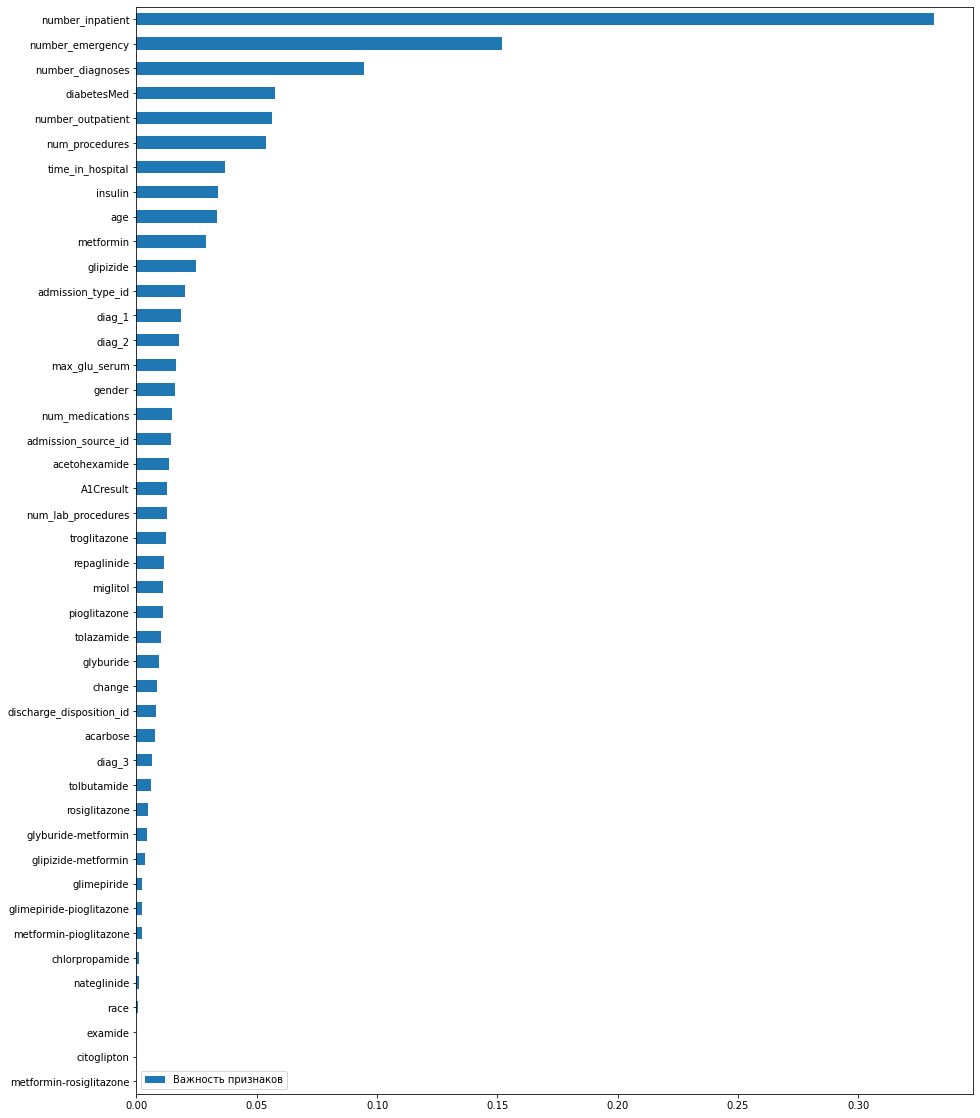

In [49]:
feature_importances_logRegDf.plot.barh(figsize=(15,20))

### RF feature importance

In [52]:
rf = RandomForestClassifier(criterion='entropy', random_state=1)
params = {"n_estimators": [100,200,300,400,500]}
grid = GridSearchCV(rf, params, cv = 3, n_jobs = -1)
grid.fit(x_train, y_train)
best_rf = grid.best_estimator_

In [ ]:
grid.best_params_

In [53]:
print(classification_report(y_test, best_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.61      0.84      0.71     10663
           1       0.51      0.38      0.43      7002
           2       0.54      0.01      0.02      2234

    accuracy                           0.59     19899
   macro avg       0.55      0.41      0.39     19899
weighted avg       0.57      0.59      0.54     19899



<AxesSubplot:>

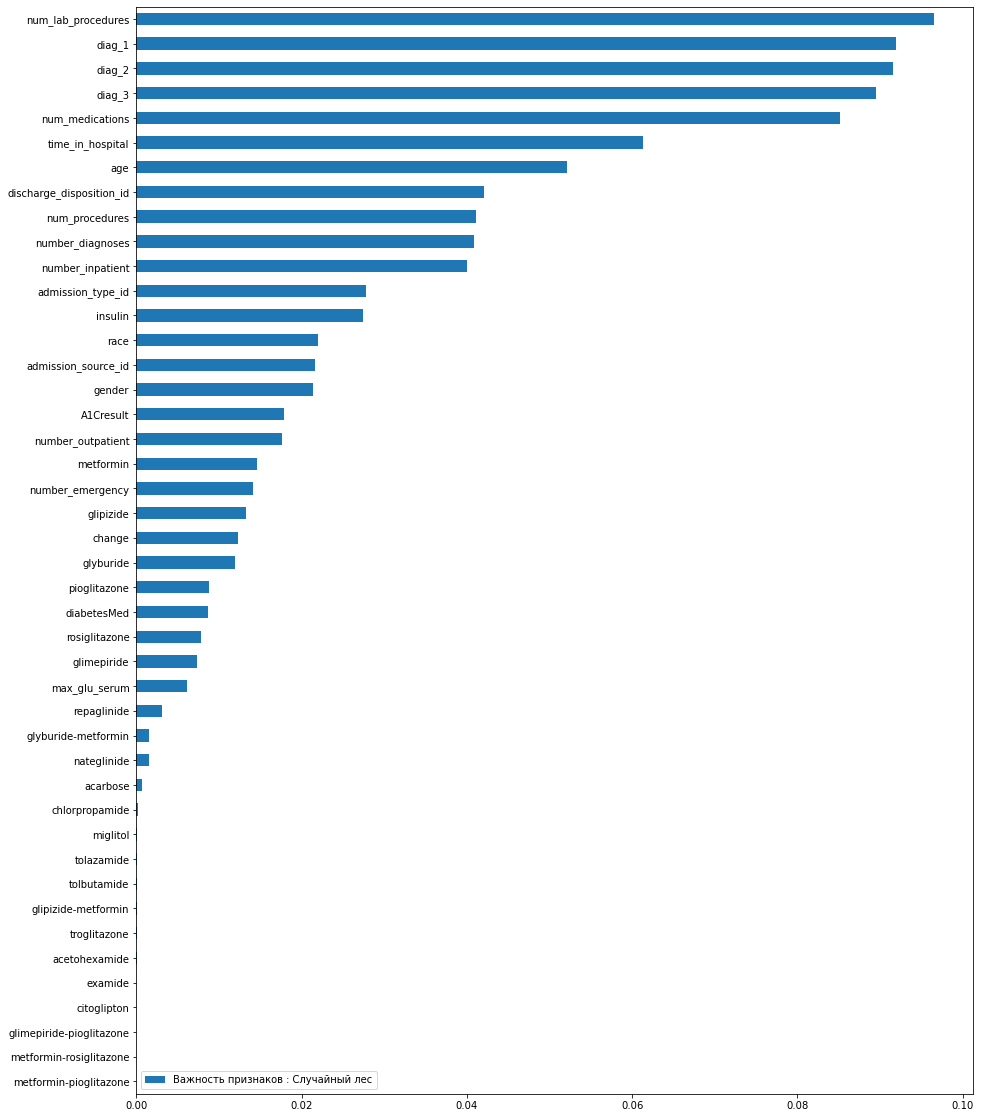

In [58]:
feature_importances_tree = best_rf.feature_importances_
feature_importances_treeDf = pd.DataFrame(feature_importances_tree,
                                            index=df.drop('readmitted', axis=1).columns,
                                            columns = ['Важность признаков : Случайный лес']).sort_values('Важность признаков : Случайный лес',ascending=True)
feature_importances_treeDf.plot.barh(figsize=(15,20))

Из оценки признаков на разных моделях видно, что показатели лабораторных анализов, кроме инсулина, слабо влияют на модель. Есть перспективы улучшения моделей на основе отбора признаков. Однако, пока отбирать признаки не будем, т.к. показатели метрик крайне малы и настройка гиперпапаметров может изменить важность признаков.

## Обучение моделей на всех признаках

In [34]:
xgb_cls = XGBClassifier(n_estimators=100, n_jobs=-1, random_state=50, learning_rate=0.03,gamma=0.9)

In [35]:
xgb_cls.fit(X_train, Y_train)

[20:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.9, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.03, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=50, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
xgb_cls.score(X_test, Y_test)

0.5838484345947033

In [37]:
print(classification_report(Y_test,xgb_cls.predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      0.85      0.71     10663
           1       0.50      0.35      0.42      7002
           2       0.51      0.02      0.03      2234

    accuracy                           0.58     19899
   macro avg       0.54      0.41      0.39     19899
weighted avg       0.56      0.58      0.53     19899



<AxesSubplot:>

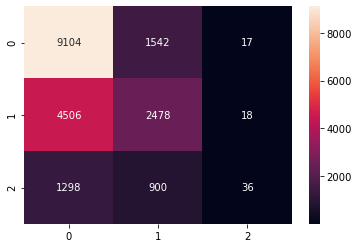

In [40]:
sns.heatmap(confusion_matrix(Y_test, xgb_cls.predict(X_test)), annot=True, fmt="1")

In [39]:
import joblib
joblib.dump(xgb_cls, "xgb_cls.pkl")

['xgb_cls.pkl']

In [41]:
lgbm = LGBMClassifier(n_estimators=1000, random_state=42)

In [42]:
lgbm.fit(X_train, Y_train)

LGBMClassifier(n_estimators=1000, random_state=42)

In [43]:
lgbm.score(X_test, Y_test)

0.5848032564450475

In [44]:
print(classification_report(Y_test,lgbm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70     10663
           1       0.50      0.44      0.46      7002
           2       0.37      0.05      0.09      2234

    accuracy                           0.58     19899
   macro avg       0.50      0.43      0.42     19899
weighted avg       0.55      0.58      0.55     19899



<AxesSubplot:>

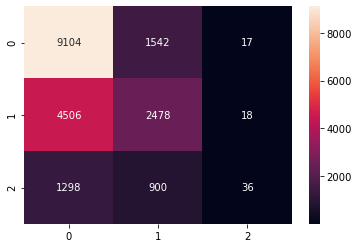

In [45]:
sns.heatmap(confusion_matrix(Y_test, xgb_cls.predict(X_test)), annot=True, fmt="1")

In [46]:
joblib.dump(lgbm, "lgbm.pkl")

['lgbm.pkl']

Как видно из отчета классификации и матрицы ошибок, модель очень плохо предсказывает целевую метку (2 - обращение менее, чем через 30 дней). Это связано с несбалансированностью выборки, неудаленными выбросами и не призведенным отбором признаков.

Пути улучшения модели:

1) Исследование распределения целевой переменной по признакам с целью определения действий с выбросами.

2) Гиперпараметрическая настройка моделей с целью определения важностей признаков на лучших парметрах.

3) Отбор важных признаков и настройка на них а)лучшей модели б)ансамбля на основе метамодели (на одинаковом наборе признаков или ансамбля моделей, обученных на разных признаках.

# Функции предобработки и предсказания. Графический интерфейс

In [50]:
repl_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
             'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
             'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
             'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
]
             
le_cols = ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3']

model = joblib.load("lgbm.pkl")

le = LabelEncoder()

def read_data(path):
    df = pd.read_csv(path, sep=";")
    df = df[df['race'] != '?']
    df = df[df['gender'] != 'Unknown/Invalid']
    dfx=df.copy()
    df = df.set_index(['encounter_id'])
    df.drop(['weight', 'payer_code', 'medical_specialty', 'patient_nbr'], axis=1, inplace=True)
    df['max_glu_serum'].replace({'None':0, '>300':1, 'Norm':2, '>200':3}, inplace = True)
    df['A1Cresult'].replace({'None':0, '>7':1, 'Norm':2, '>8':3}, inplace = True)
    df['change'].replace({'No':0, 'Ch':1}, inplace = True)
    df['diabetesMed'].replace({'No':0, 'Yes':1}, inplace = True)
    df['readmitted'].replace({'NO':0, '>30':1, '<30':2}, inplace = True)
    for col in repl_cols:
        df[col].replace({'No':0, 'Steady':1, 'Up':2, 'Down':3}, inplace = True)
    for col in le_cols:
        le.classes_ = np.load(f"le_{col}.npy", allow_pickle=True)
        df[col] = le.transform(df[col])
    df.drop('readmitted', axis=1, inplace = True) 
    return df, dfx



In [2]:
import warnings
warnings.filterwarnings("ignore")
from PyQt5.QtWidgets import *
from PyQt5.QtCore import Qt
import sys
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder

def main():   
    
    repl_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
                 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
    ]
                 
    le_cols = ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3']
    
    model = joblib.load("lgbm.pkl")
    
    le = LabelEncoder()
    
    def read_data(path):
        df = pd.read_csv(path, sep=";")
        df = df[df['race'] != '?']
        df = df[df['gender'] != 'Unknown/Invalid']
        dfx=df.copy()
        df = df.set_index(['encounter_id'])
        df.drop(['weight', 'payer_code', 'medical_specialty', 'patient_nbr'], axis=1, inplace=True)
        df['max_glu_serum'].replace({'None':0, '>300':1, 'Norm':2, '>200':3}, inplace = True)
        df['A1Cresult'].replace({'None':0, '>7':1, 'Norm':2, '>8':3}, inplace = True)
        df['change'].replace({'No':0, 'Ch':1}, inplace = True)
        df['diabetesMed'].replace({'No':0, 'Yes':1}, inplace = True)
        df['readmitted'].replace({'NO':0, '>30':1, '<30':2}, inplace = True)
        for col in repl_cols:
            df[col].replace({'No':0, 'Steady':1, 'Up':2, 'Down':3}, inplace = True)
        for col in le_cols:
            le.classes_ = np.load(f"le_{col}.npy", allow_pickle=True)
            df[col] = le.transform(df[col])
        df.drop('readmitted', axis=1, inplace = True) 
        return df, dfx
    
    def pred(df):
        filePath, _ = QFileDialog.getOpenFileName(None,'Open file',  "","All Files (*);;CSV Files (*.csv)")
        df, dfx = read_data(filePath)
        y_pred = model.predict(df)
        y_pred_df = pd.DataFrame(y_pred, columns=['pred_readmitted'])
        y_pred_df.replace({0:'NO', 1:'>30', 2:'<30'}, inplace = True)
        preddf = pd.concat([dfx, y_pred_df], axis=1, join='outer')
        fileName, _ = QFileDialog.getSaveFileName(None,"QFileDialog.getSaveFileName()","","All Files (*);;csv(*.csv)")
        preddf.to_csv(fileName,index=False, encoding='utf-8')
        text.append(f'Данные сохранены в "{fileName}"')
        text.append('#############################')
        text.append(f'Обработано {len(y_pred_df)} значений.')
        text.append(str(y_pred_df))
    
    
    app = QApplication(sys.argv) 
    w = QMainWindow()
    w.setGeometry(440,800,800,440)
    w.setWindowTitle("GUI")
    qr = w.frameGeometry()
    cp = QDesktopWidget().availableGeometry().center()
    qr.moveCenter(cp)
    w.move(qr.topLeft())
    
    label = QLabel(w)
    label.setText('''Данное програмное обеспечение предназначено для классификации повторной госпитализации пациентов.\n
    На вход принимается набор данных в формате CSV. На выходе возвращается этот же набор данных с добавленным\n
    столбцом предсказанной целевой переменной.''')
    label.setAlignment(Qt.AlignCenter)
    label.adjustSize()
    label.move(100,20)



    # Текстовое поле
    text = QTextEdit(w)
    text.setGeometry(10,160,780,270)
    
    # Предсказание из файла
    label = QLabel(w)
    label.setText('Нажмите, чтобы выбрать файл для предсказания:')
    label.adjustSize()
    label.move(40,120)
    b2 = QPushButton(w)
    b2.setText("Predict file")
    b2.move(300,110)
    b2.clicked.connect(pred)
                                 
    w.show()
    app.exec_()

if __name__ == '__main__':
    main()